# **Classification Tree: Heart Attack Prediction**

In [ ]:
#Import the necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#Upload the data
from google.colab import files
Uploaded = files.upload()

Saving heart-dataset.csv to heart-dataset (3).csv


In [ ]:
#reading the dataset as dataframe
df = pd.read_csv("heart-dataset.csv")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#rename some columns of the data
df.rename(columns ={'caa':'ca', 'thalachh':'thalach', 'restecg':'rest-ecg'}, inplace = True )

In [ ]:
#show the new data
df.head(10)

,age,sex,cp,trtbps,chol,fbs,rest-ecg,thalach,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#knowing the shape of the data
df.shape

(303, 14)

In [ ]:
#Knowing the statistical summary of the numerical columns
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest-ecg,thalach,exng,oldpeak,slp,ca,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Detecting the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest-ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Knowing the values of each column
for column in df.columns:
    print("------  " + column + "  ------")
    print(df[column].value_counts())

------  age  ------
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
------  sex  ------
1    207
0     96
Name: sex, dtype: int64
------  cp  ------
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
------  trtbps  ------
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101 

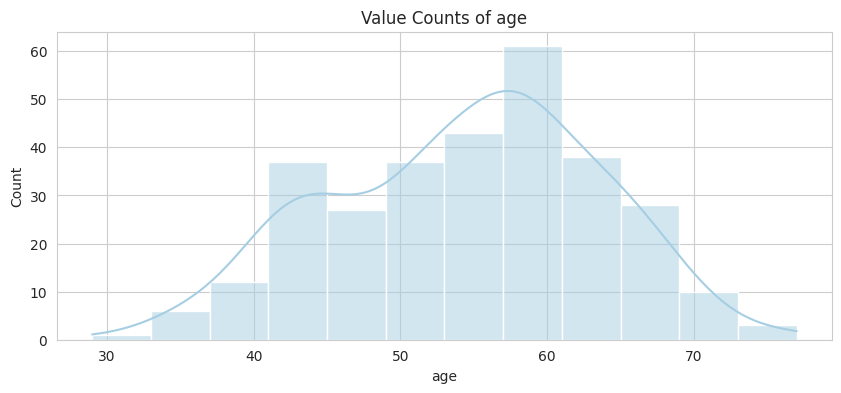

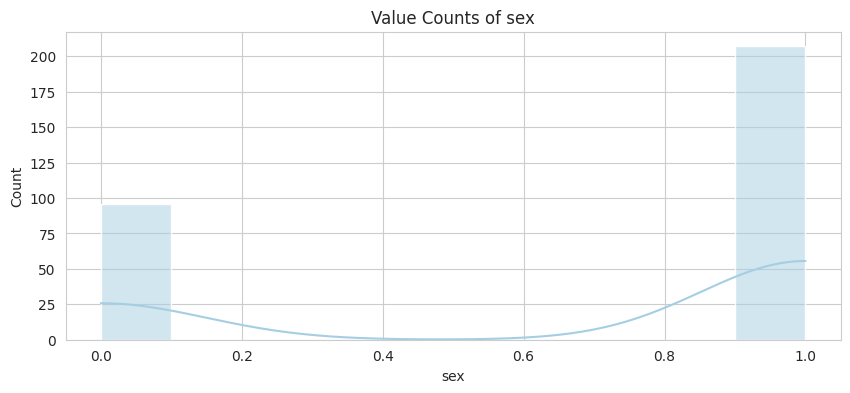

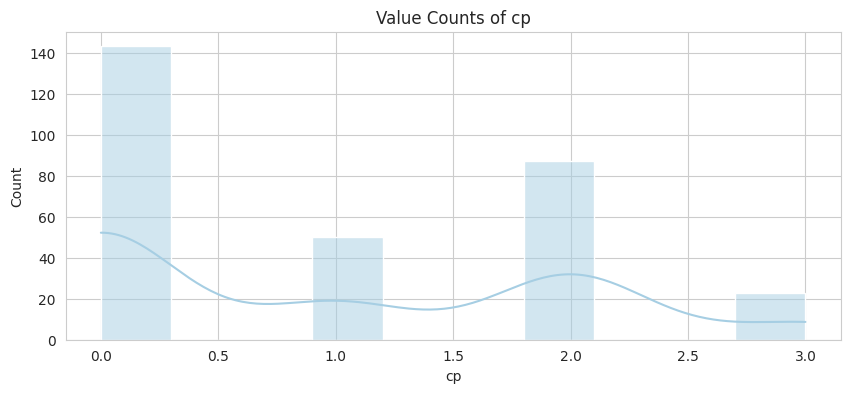

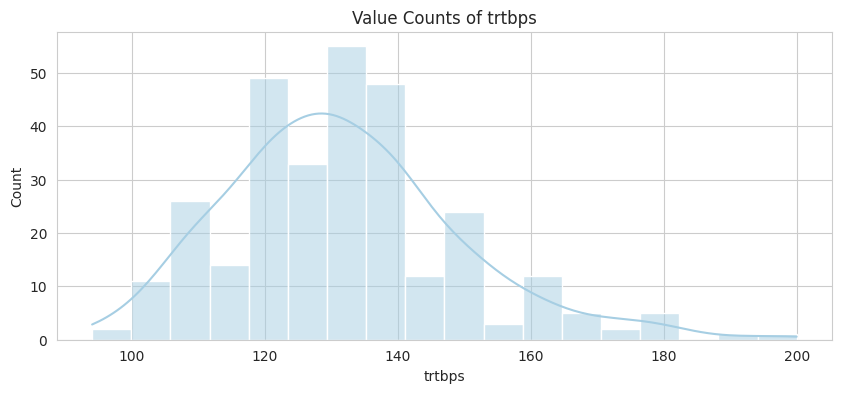

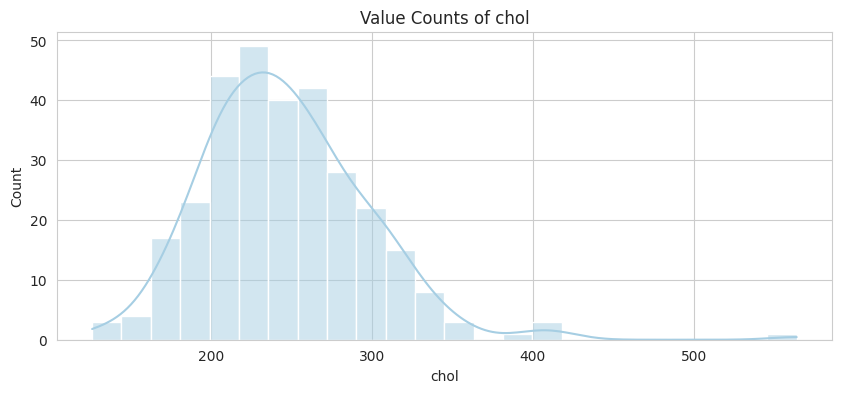

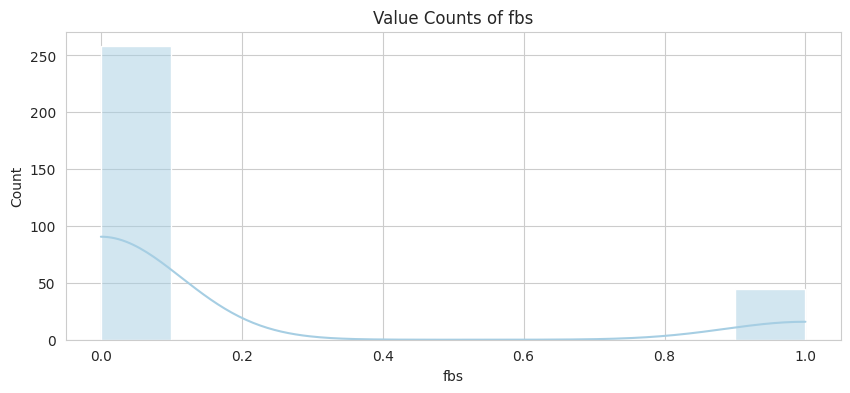

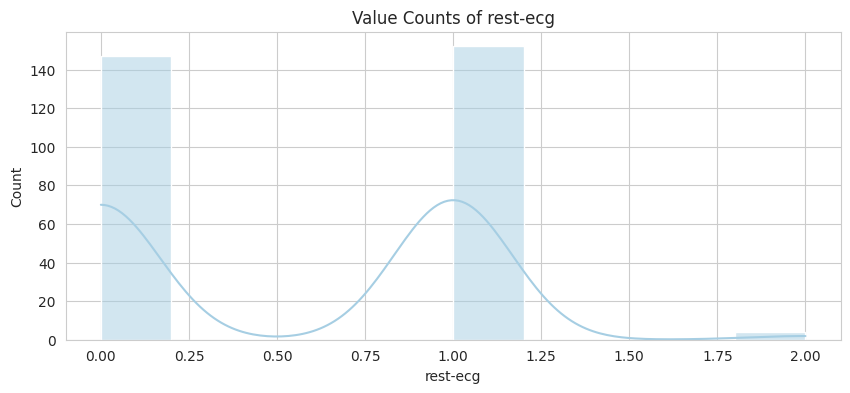

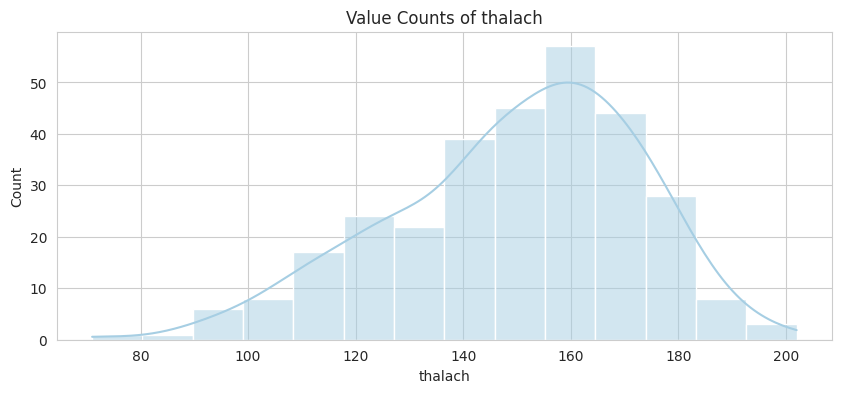

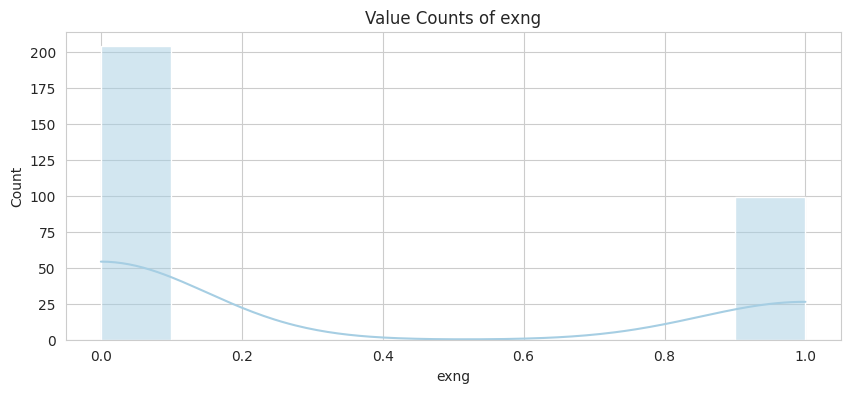

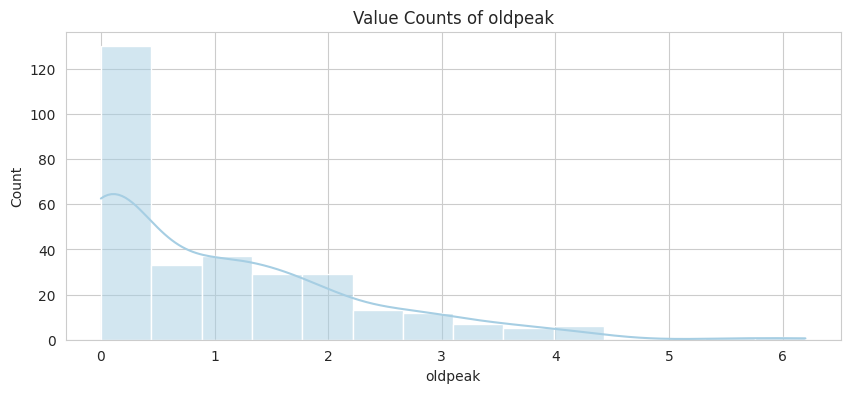

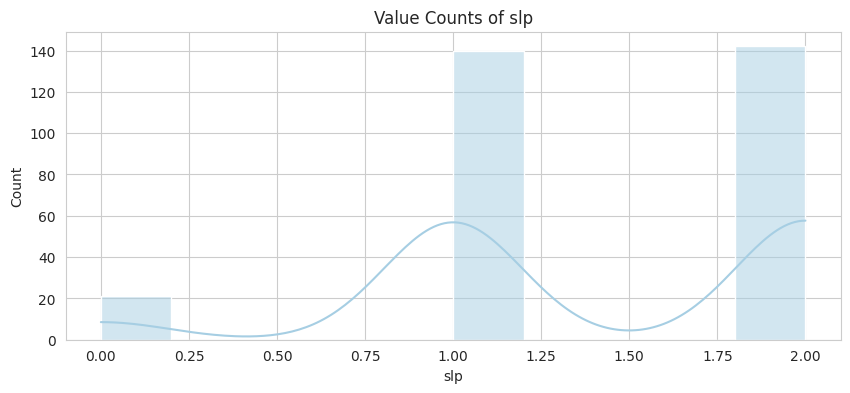

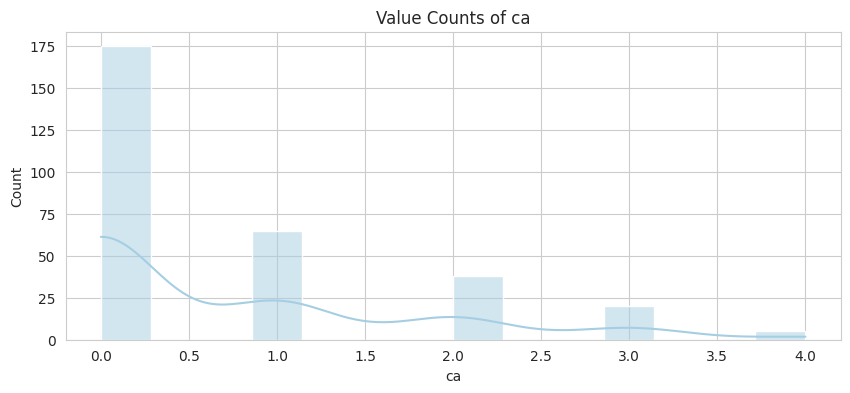

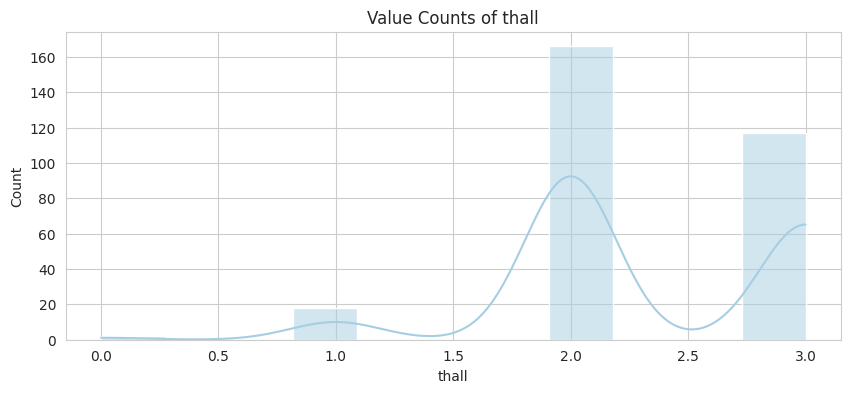

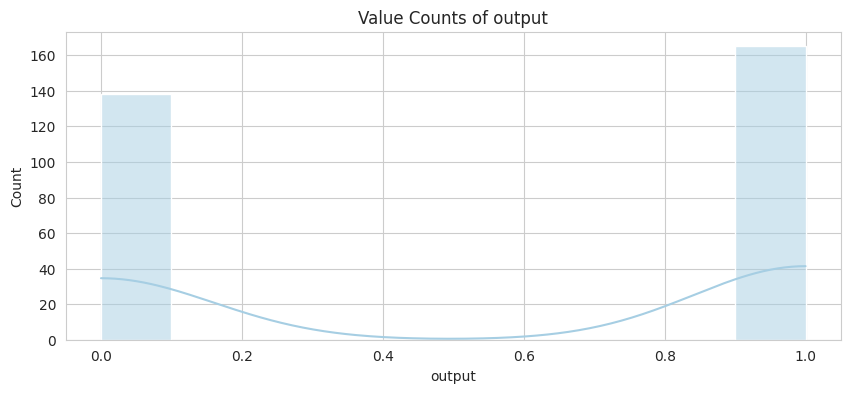

In [ ]:
#Visualizing the data
for column in df.columns:
    plt.figure(figsize=(10, 4))
    if df[column].dtype == 'object':
        sns.countplot(y=column, data=df)
    else:
        sns.histplot(df[column], kde=True)

    plt.title('Value Counts of ' + column)
    plt.show()


In the ca column of our dataset, we identified the value 4 as noise. Since our dataset is relatively small, we chose not to remove these noisy entries. Instead, to retain as much data as possible, we replaced the noise (value 4) with NaN (a marker for missing values). Then, to handle these missing values, we imputed them with the median value of the ca column. This approach preserves the dataset size while mitigating the impact of noise by using a central tendency measure (median) for replacement.







In [ ]:
#Pre-processing
print(df['ca'].value_counts())

df['ca'] =df['ca'].replace(4,np.NAN)
print(df['ca'].value_counts())

df['ca'] =df['ca'].fillna(df['ca'].median())
print(df['ca'].value_counts())

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
0.0    175
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


In [ ]:
#delete the duplicates values
df.drop_duplicates()
df.shape

(303, 14)

In [ ]:
#counts missing values in each DataFrame columm
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest-ecg    0
thalach     0
exng        0
oldpeak     0
slp         0
ca          0
thall       0
output      0
dtype: int64

In [ ]:
#Features Selection
x=df[['age','sex','cp','chol','thalach','exng','oldpeak','slp','ca','thall']].values
x[:5]

array([[ 63. ,   1. ,   3. , 233. , 150. ,   0. ,   2.3,   0. ,   0. ,
          1. ],
       [ 37. ,   1. ,   2. , 250. , 187. ,   0. ,   3.5,   0. ,   0. ,
          2. ],
       [ 41. ,   0. ,   1. , 204. , 172. ,   0. ,   1.4,   2. ,   0. ,
          2. ],
       [ 56. ,   1. ,   1. , 236. , 178. ,   0. ,   0.8,   2. ,   0. ,
          2. ],
       [ 57. ,   0. ,   0. , 354. , 163. ,   1. ,   0.6,   2. ,   0. ,
          2. ]])

In [ ]:
#Retrieves and displays the first five values from the 'output' column of DataFram
y=df['output'].values
y[:5]

array([1, 1, 1, 1, 1])

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train ,x_test , Y_train , y_test =train_test_split(x , y, test_size=0.2 , random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


In [ ]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
deTree =DecisionTreeClassifier()

In [ ]:
#Training
deTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#Predict target values and displays the first five predicted values in the y_pred variable
y_pred = deTree.predict(x_test)
y_pred[:5]

array([0, 1, 1, 1, 1])

In [ ]:
#Evaluation Performance
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.6f}")

Decision Tree Accuracy: 0.868852


Confusion Matrix: [[20  5]
 [ 5 31]]


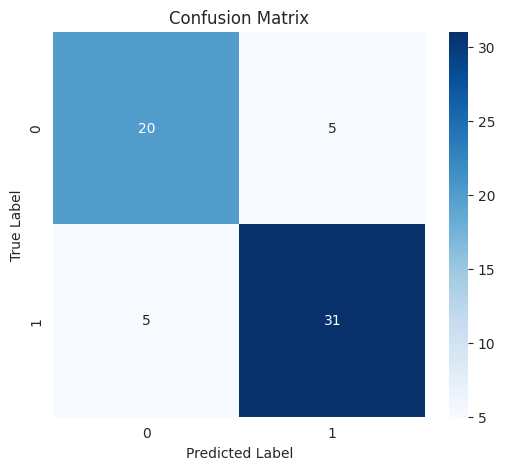

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.86      0.86      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



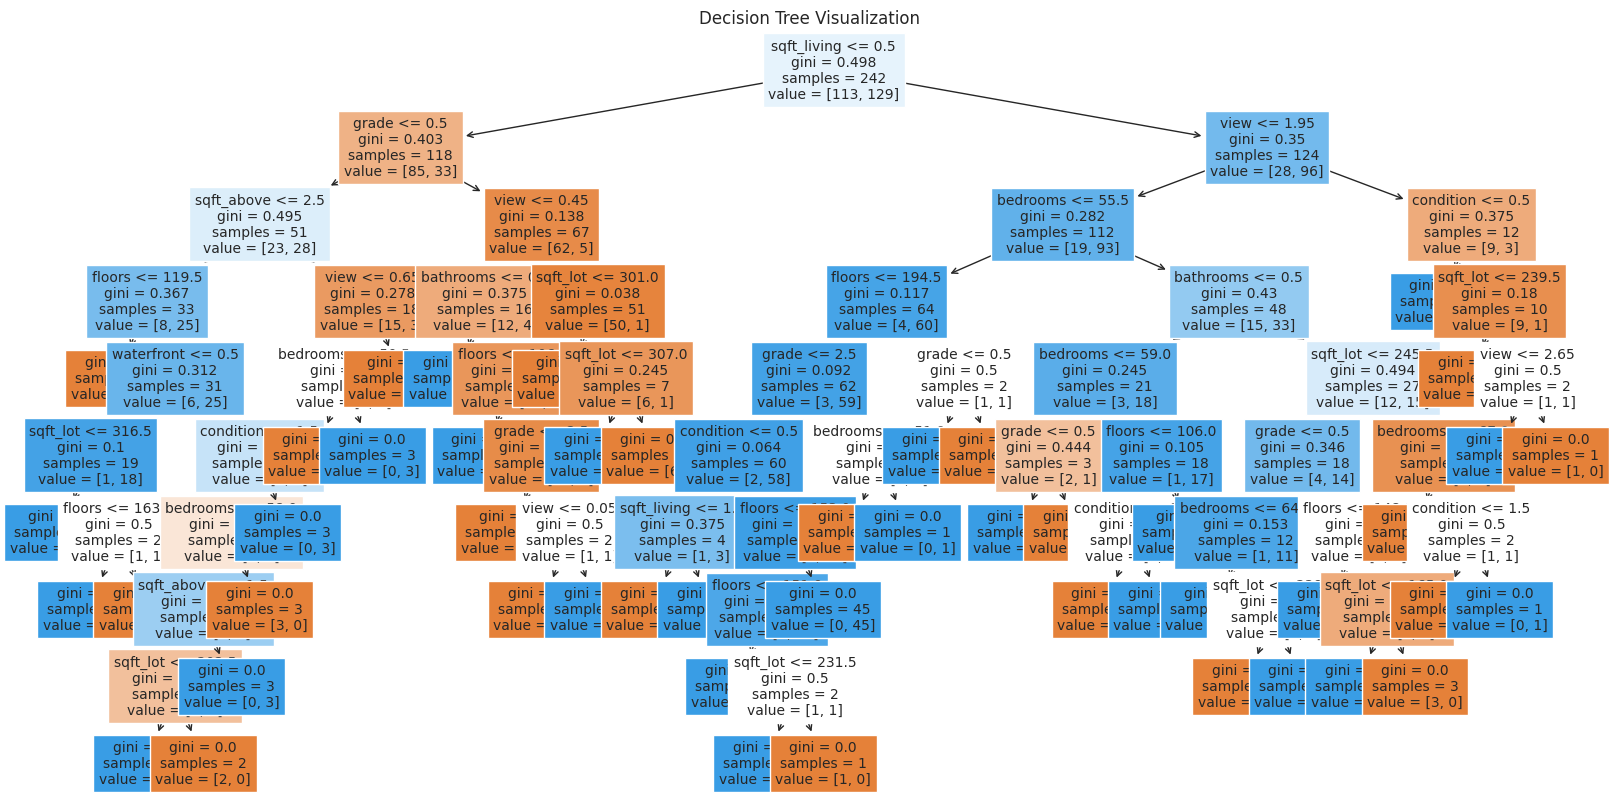

In [ ]:
# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
feature_names = X.columns
plot_tree(deTree, filled=True, feature_names=feature_names, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# **Regression** **Tree: House Pricing Prediction**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload the data
from google.colab import files
Uploaded = files.upload()

Saving house_data.csv to house_data (2).csv


In [ ]:
#reading the dataset as dataframe
df = pd.read_csv("house_data.csv")
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#Shape
df.shape

(21613, 21)

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Replace zero values with NaN in specific columns ('yr_renovated' and 'sqft_basement') to indicate missing or undefined data in the DataFrame.
df.yr_renovated.replace(0, np.nan, inplace = True)
df.sqft_basement.replace(0, np.nan, inplace = True)

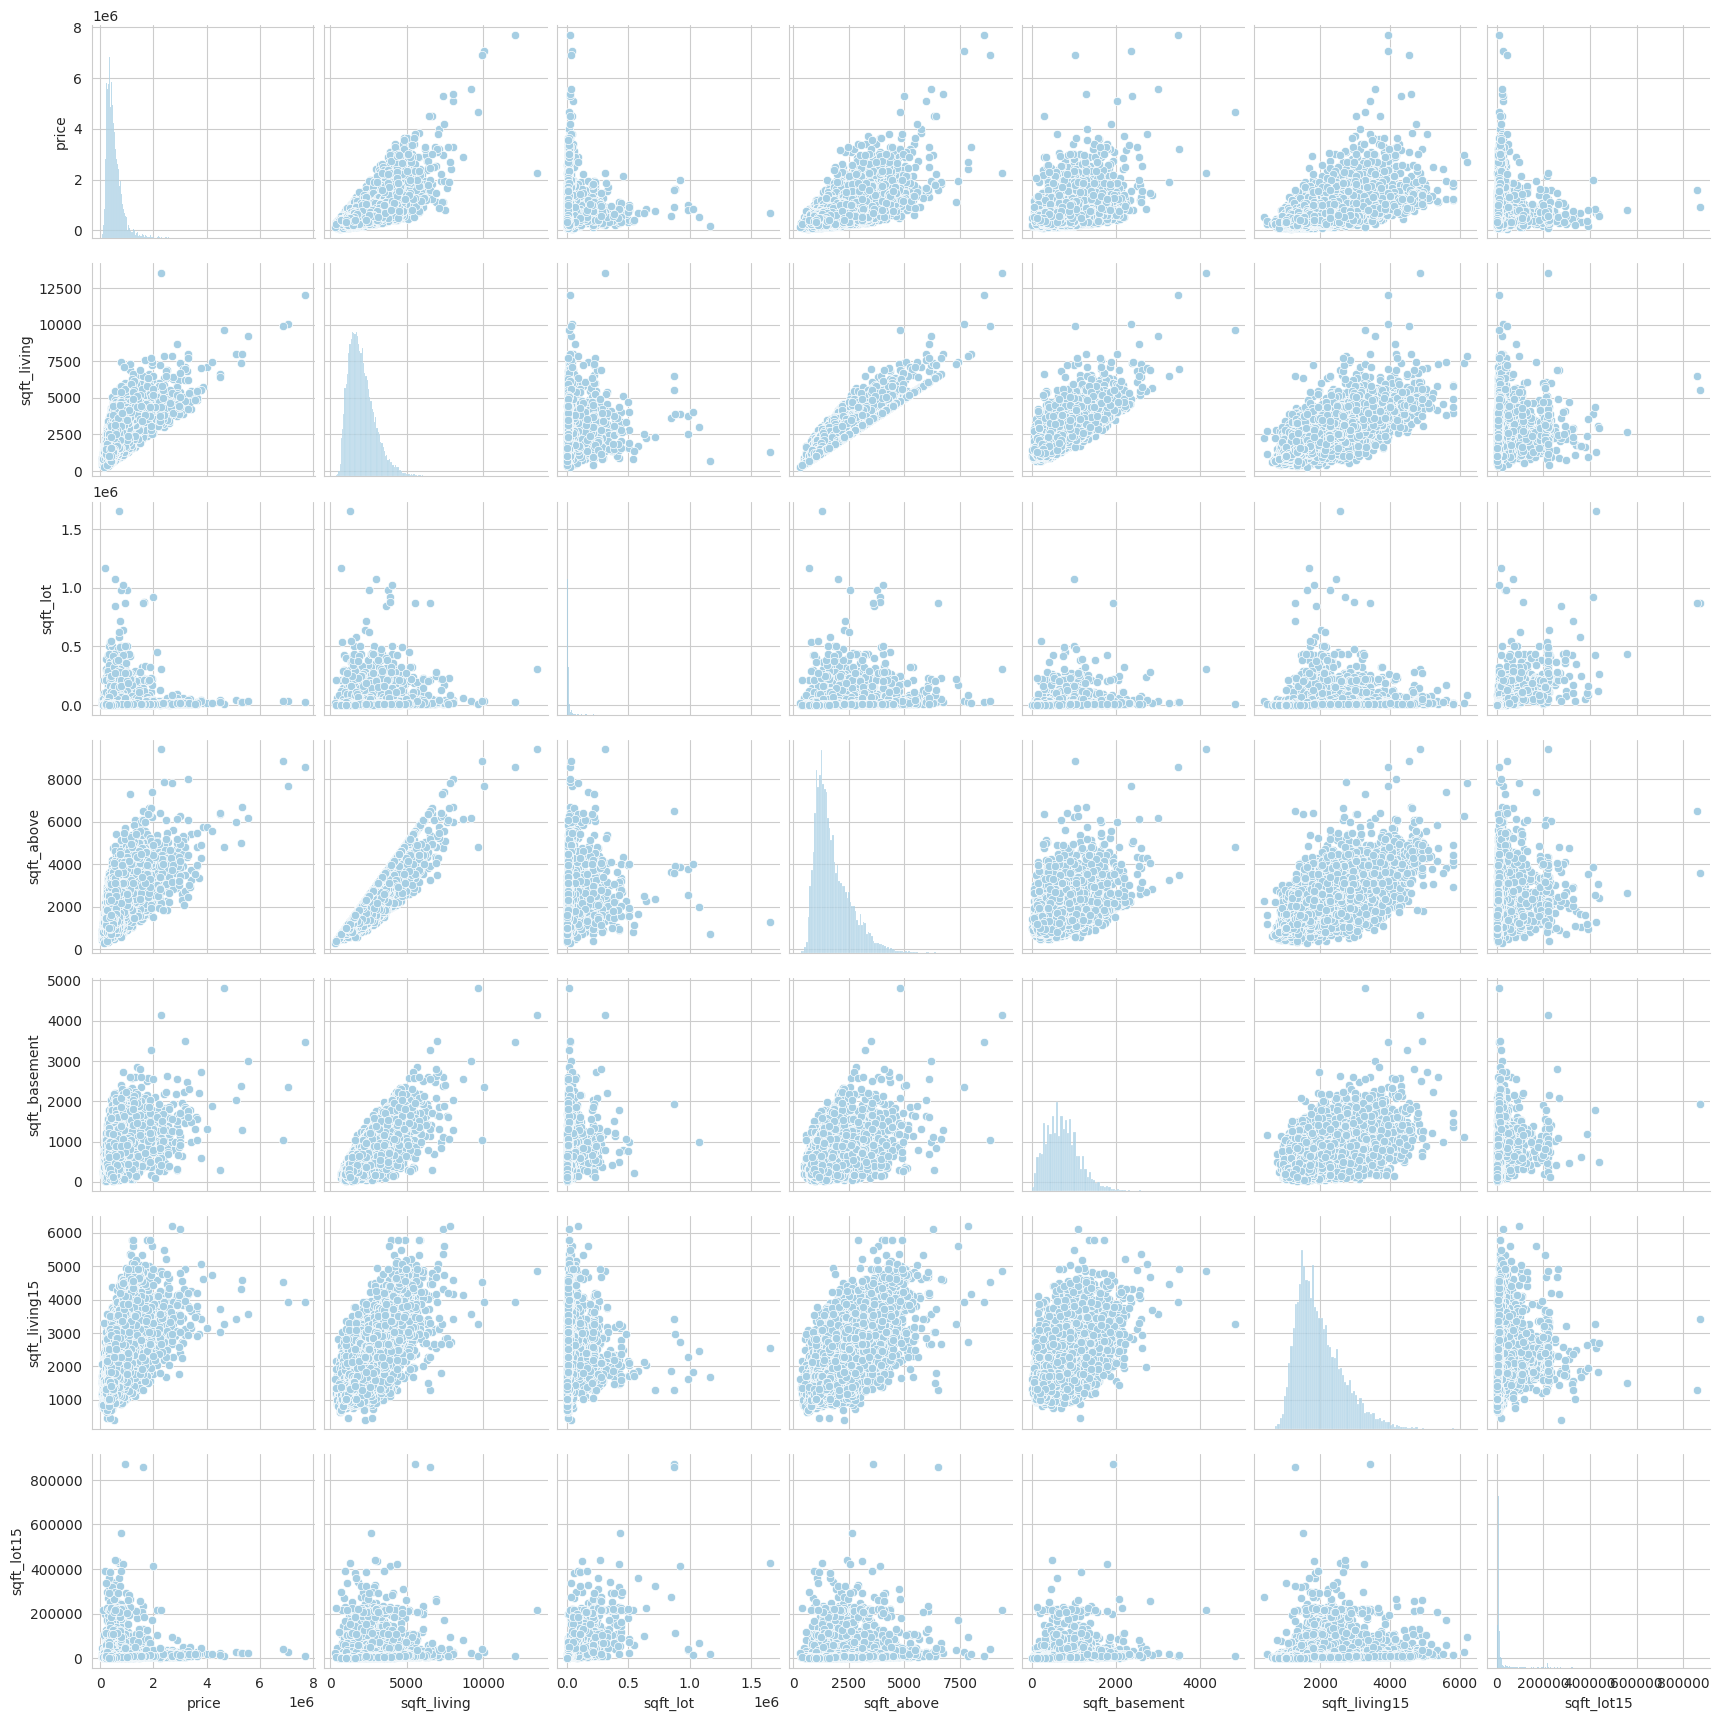

In [ ]:
#Vizualization of scatterplots
sns.pairplot(df[
    ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
])
plt.show()

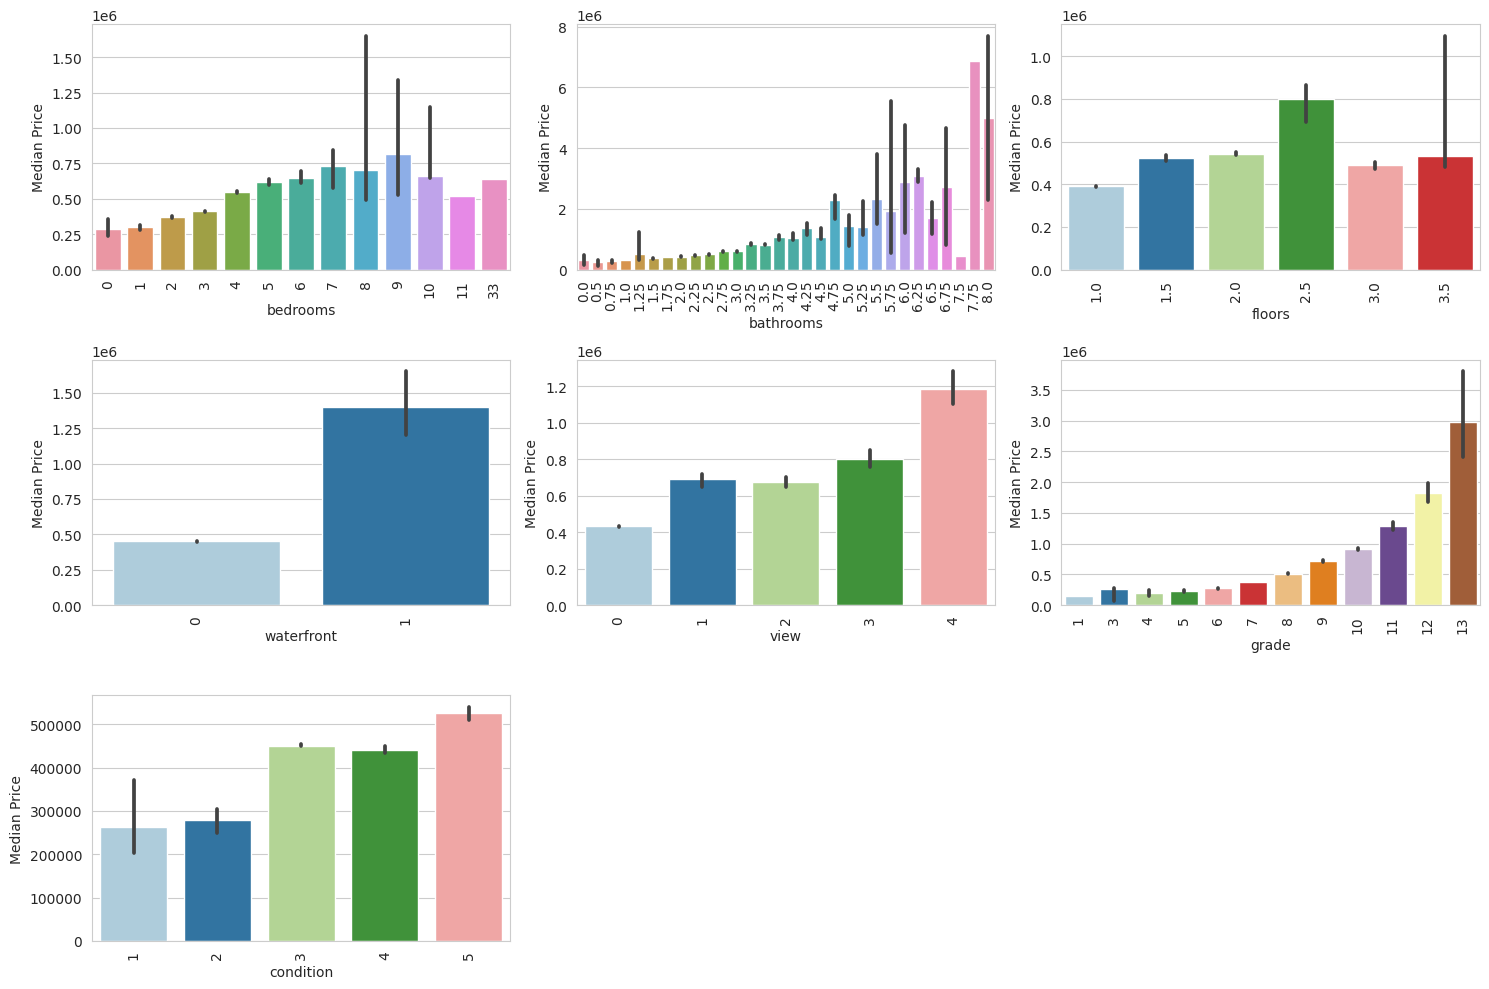

In [ ]:
cat_col = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "grade", "condition"]
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_col):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(3,3,i+1)
    sns.barplot(x=col, y ='price', estimator = np.median, data = df, ax = ax)
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
    plt.tight_layout()
plt.show()

In [ ]:
#Drop id, date, zipcode columns
df_dropped = df.drop(columns=['id', 'date', 'zipcode'])

In [ ]:
print("Percentage of Missing Values in yr_renovated column:\n{:.2f}%".format(df_dropped.yr_renovated.isnull().sum()*100 / df_dropped.shape[0]))
print("Percentage of Missing Values in sqft_basement column:\n{:.2f}%".format(df_dropped.sqft_basement.isnull().sum()*100 / df_dropped.shape[0]))

Percentage of Missing Values in yr_renovated column:
95.77%
Percentage of Missing Values in sqft_basement column:
60.73%


In [ ]:
df_dropped.drop(columns = "yr_renovated", inplace = True) # Drop yr_renovated column which has 95% of null values
df_dropped.drop(columns = "sqft_basement", inplace = True) # Drop yr_renovated column which has 60% of null values

In [ ]:
highly_skewed_columns = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15']
df_dropped[highly_skewed_columns] = np.log(df_dropped[highly_skewed_columns])

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
X = df_dropped.drop(columns = 'price')
y = df_dropped['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 12)

In [ ]:
#Modeling
from sklearn.tree import DecisionTreeRegressor
deTree = DecisionTreeRegressor(random_state = 12)

In [ ]:
#Training
deTree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=12)

In [ ]:
#Predict target values
y_pred = deTree.predict(X_test)

In [ ]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
accuracy =r2_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE):{mse}")

rmse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE):{mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.6f}")


Accuracy:0.796899750716791
Mean Squared Error (MSE):31206939304.079865
Mean Squared Error (MSE):31206939304.079865
R-squared (R2): 0.796900


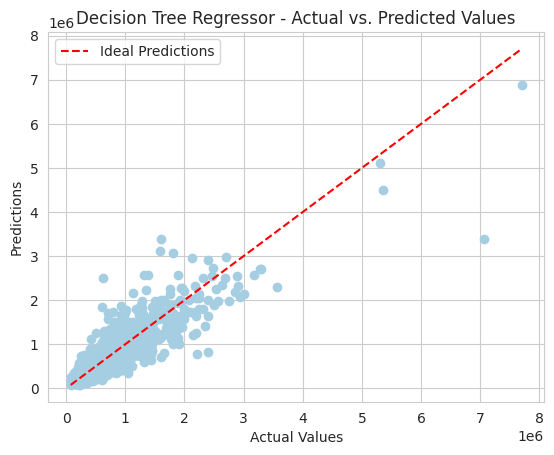

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regressor - Actual vs. Predicted Values')
plt.legend()
plt.show()

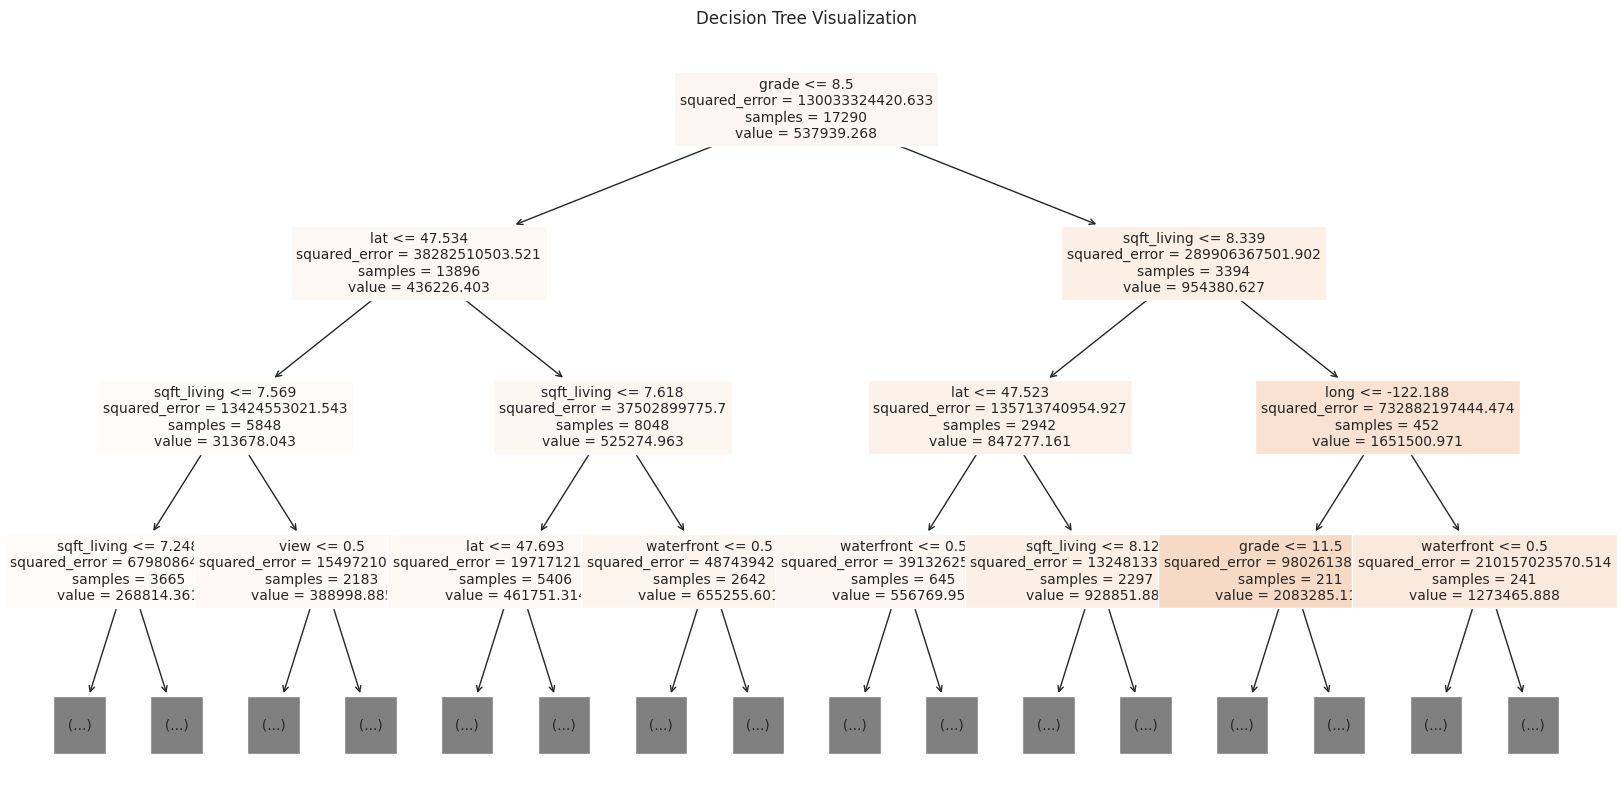

In [ ]:
from sklearn.tree import plot_tree
# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
feature_names = X.columns
plot_tree(deTree, filled=True, feature_names=feature_names, fontsize=10, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()